In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing

### Naives Bayes Classifier

In [2]:
dataset = pd.read_excel('combination2.xlsx')

In [4]:
dataset = dataset.drop(['NumeroConferimento', 'Kind', 'Farm_ID'], axis=1)

In [5]:
dataset.dropna(inplace=True)

In [123]:
#dictionary1 = {"INJ": 0, "ORAL SOLU": 1, "PREMIX": 2, "ORAL POWD": 3}
#dataset["Type_of_medication"] = dataset["Type_of_medication"].map(dictionary1).astype(int)


In [29]:
train, test = train_test_split(dataset, test_size=0.1)
pd.options.mode.chained_assignment = None

X_train = train[['Bacteria', 'Active_principle', 'Value', 'Open_cycle',
       'Close_cycle', 'Type_of_medication','Active_principle_mg', 'DDDA', 'DCDA']]
Y_train = train[['Result']]
X_test = test[['Bacteria', 'Active_principle', 'Value', 'Open_cycle',
       'Close_cycle', 'Type_of_medication', 'Active_principle_mg', 'DDDA', 'DCDA']]
Y_test = test[['Result']]


le_Bacteria = preprocessing.LabelEncoder()
le_Active_principle = preprocessing.LabelEncoder()
le_Type_of_medication = preprocessing.LabelEncoder()
le_Result = preprocessing.LabelEncoder()

X_train['Bacteria'] = le_Bacteria.fit_transform(X_train['Bacteria'])
X_train['Active_principle'] = le_Active_principle.fit_transform(X_train['Active_principle'])
X_train['Type_of_medication'] = le_Type_of_medication.fit_transform(X_train['Type_of_medication'])
Y_train['Result'] = le_Result.fit_transform(Y_train['Result'])

X_test['Bacteria'] = le_Bacteria.fit_transform(X_test['Bacteria'])
X_test['Active_principle'] = le_Active_principle.fit_transform(X_test['Active_principle'])
X_test['Type_of_medication'] = le_Type_of_medication.fit_transform(X_test['Type_of_medication'])
Y_test['Result'] = le_Result.fit_transform(Y_test['Result'])



#clf = tree.DecisionTreeClassifier()
#clf = clf.fit(train[feature_names], train['Labels'])

#print(le_labels.inverse_transform(clf.predict(test[feature_names])))

In [33]:
from sklearn.metrics import roc_curve, auc
gnb = GaussianNB()
gnb.fit(X_train, Y_train.values.ravel())
gnb.predict(X_test)
gnb.score(X_test, Y_test)
print('Accuracy of Naive Bayes, on the training set:{:.3f}'.format(gnb.score(X_train, Y_train)))
print('Accuracy of Naive Bayes, on the test set:{:.3f}'.format(gnb.score(X_test, Y_test)))

Accuracy of Naive Bayes, on the training set:0.497
Accuracy of Naive Bayes, on the test set:0.530


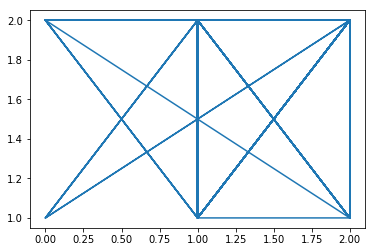

In [34]:
plt.figure()
plt.plot(Y_test, gnb.predict(X_test)) 

### KNN Classifier 

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train.values.ravel())
knn.predict(X_test)
knn.score(X_test, Y_test)

0.56155143338954472

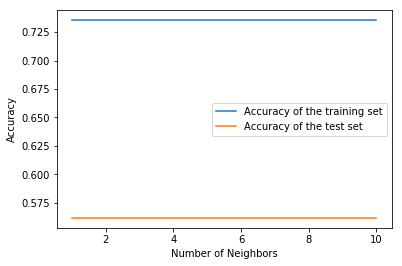

In [38]:
# How many class gives more accurancy?

training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, Y_train.values.ravel())
    training_accuracy.append(knn.score(X_train, Y_train))
    test_accuracy.append(knn.score(X_test, Y_test))
    

plt.plot(neighbors_settings, training_accuracy, label= "Accuracy of the training set")
plt.plot(neighbors_settings, test_accuracy, label= "Accuracy of the test set")
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()

In [40]:
print('Accuracy of Naive Bayes, on the training set:{:.3f}'.format(knn.score(X_train, Y_train)))
print('Accuracy of Naive Bayes, on the training set:{:.3f}'.format(knn.score(X_test, Y_test)))

Accuracy of Naive Bayes, on the training set:0.735
Accuracy of Naive Bayes, on the training set:0.562
